In [2]:

import pandas as pd
import numpy as np
from collections import Counter


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

from scipy.sparse import hstack


import matplotlib.pyplot as plt


hashtag_posts= pd.read_csv("/Users/ritushetkar/Downloads/hashtag_posts_unnested.csv")


/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_2328/3817361443.py:18: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  hashtag_posts= pd.read_csv("/Users/ritushetkar/Downloads/hashtag_posts_unnested.csv")


In [3]:
len(hashtag_posts) 
hashtag_posts.columns

Index(['id', 'text', 'textLanguage', 'createTimeISO', 'isAd', 'isMuted',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSlideshow', 'isPinned', 'isSponsored', 'authorMeta_nickName',
       'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address'],
      dtype='object')

In [4]:

hashtag_posts['createTimeISO'] = pd.to_datetime(hashtag_posts['createTimeISO'])
# Create new columns
hashtag_posts['date'] = hashtag_posts['createTimeISO'].dt.date
hashtag_posts['month'] = hashtag_posts['createTimeISO'].dt.strftime('%b')   # e.g., 'Feb'
hashtag_posts['year'] = hashtag_posts['createTimeISO'].dt.year
hashtag_posts['week'] = hashtag_posts['createTimeISO'].dt.isocalendar().week


hashtag_posts.head()

,id,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,...,detailedMentions_nickName,hashtags_name,effectStickers_name,searchHashtag_views,searchHashtag_name,locationMeta_address,date,month,year,week
0,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,NaN,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
1,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skincare,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
2,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,formelskin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
3,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skin,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
4,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,haut,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8


In [5]:
hashtag_posts_filtered = hashtag_posts[hashtag_posts['textLanguage'].isin(['en', 'de'])]

hashtag_posts_filtered.head(2)

,id,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,...,detailedMentions_nickName,hashtags_name,effectStickers_name,searchHashtag_views,searchHashtag_name,locationMeta_address,date,month,year,week
0,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,NaN,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8
1,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,FORMELSKIN,skincare,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8


In [6]:
hashtag_posts_filtered.columns

Index(['id', 'text', 'textLanguage', 'createTimeISO', 'isAd', 'isMuted',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSlideshow', 'isPinned', 'isSponsored', 'authorMeta_nickName',
       'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address',
       'date', 'month', 'year', 'week'],
      dtype='object')

In [7]:
# Are there any rows with empty hashtags
empty_hashtags_count = hashtag_posts_filtered[hashtag_posts_filtered['hashtags_name'].str.strip() == ''].shape[0]
print("Empty hashtag rows:", empty_hashtags_count)


Empty hashtag rows: 0


In [8]:
#hashtags from
hashtag_trends = (
    hashtag_posts_filtered.groupby(['year', 'week', 'hashtags_name'])
    .size()
    .reset_index(name='count')
    .sort_values(['year', 'week', 'count'], ascending=[False, False, False])
)

hashtag_trends.sort_values(by='count', ascending=False)

,year,week,hashtags_name,count
25394,2025,12,skincare,414
27100,2025,13,skincare,366
23610,2025,11,skincare,295
21940,2025,10,skincare,250
25431,2025,12,skincareroutine,250
...,...,...,...,...
16154,2024,50,mixaaureacicarepair,1
16153,2024,50,minivlog,1
16152,2024,50,mformaesthetics,1
16151,2024,50,medizin,1


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Hashtag Analysis with Enagement 


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime





hashtag_posts_filtered['engagement'] = hashtag_posts_filtered['diggCount'] + hashtag_posts_filtered['shareCount'] + hashtag_posts_filtered['commentCount'] + hashtag_posts_filtered['collectCount']




/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_2328/999021758.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_posts_filtered['engagement'] = hashtag_posts_filtered['diggCount'] + hashtag_posts_filtered['shareCount'] + hashtag_posts_filtered['commentCount'] + hashtag_posts_filtered['collectCount']


In [11]:
hashtag_posts_filtered.head(2)

,id,text,textLanguage,createTimeISO,isAd,isMuted,diggCount,shareCount,playCount,collectCount,...,hashtags_name,effectStickers_name,searchHashtag_views,searchHashtag_name,locationMeta_address,date,month,year,week,engagement
0,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,NaN,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8,27
1,7472859679681482006,@FORMELSKIN | spare 40% auf die ersten zwei Mo...,de,2025-02-18 20:32:13+00:00,False,False,23,0,349,2,...,skincare,NaN,2700000000,hautpflege,NaN,2025-02-18,Feb,2025,8,27


In [12]:

hashtag_stats= (
    hashtag_posts_filtered.groupby('hashtags_name')
    .agg(
        total_posts=('id', 'nunique'),
        average_engagement=('engagement', 'mean')
    )
    .sort_values('total_posts', ascending=False)
    .reset_index()
)


weekly = (
    hashtag_posts_filtered.groupby(['week', 'hashtags_name'])['engagement'].mean().reset_index()
)
weekly['relative_engagement_week'] = (
    weekly.groupby('week')['engagement'].transform(lambda x: x / x.max())
)


monthly = (
    hashtag_posts_filtered.groupby(['month', 'hashtags_name'])['engagement'].mean().reset_index()
)
monthly['relative_engagement_month'] = (
    monthly.groupby('month')['engagement'].transform(lambda x: x / x.max())
)

yearly = (
    hashtag_posts_filtered.groupby(['year', 'hashtags_name'])['engagement'].mean().reset_index()
)
yearly['relative_engagement_year'] = (
    yearly.groupby('year')['engagement'].transform(lambda x: x / x.max())
)


relative_avg = (
    weekly.groupby('hashtags_name')['relative_engagement_week'].mean().reset_index()
    .merge(monthly.groupby('hashtags_name')['relative_engagement_month'].mean().reset_index(), on='hashtags_name', how='outer')
    .merge(yearly.groupby('hashtags_name')['relative_engagement_year'].mean().reset_index(), on='hashtags_name', how='outer')
)


hashtag_stats= hashtag_stats.merge(relative_avg, on='hashtags_name', how='left')

hashtag_stats.head(10)



,hashtags_name,total_posts,average_engagement,relative_engagement_week,relative_engagement_month,relative_engagement_year
0,skincare,2483,226471.272189,0.077804,0.030065,0.081633
1,skincareroutine,1511,150553.736858,0.064207,0.020086,0.067267
2,hautpflege,1160,30795.203115,0.017148,0.005135,0.147204
3,fyp,1111,258208.002437,0.087295,0.033499,0.067300
4,koreanskincare,608,178289.707617,0.090619,0.025879,0.018234
5,skincaretips,553,113914.929317,0.053714,0.015448,0.042129
6,viral,397,351734.288379,0.079961,0.040708,0.046826
7,foryou,367,249121.160458,0.086136,0.031899,0.058319
8,kbeauty,359,145089.056911,0.084474,0.021975,0.015685
9,beauty,314,390849.674419,0.070092,0.041765,0.232512


In [13]:
from sklearn.preprocessing import MinMaxScaler

def top_hashtags_df_consistent(min_posts=20):
    # Step 1: Aggregate engagement per hashtag per week
    weekly_stats = (
        hashtag_posts_filtered
        .groupby(['hashtags_name', 'year', 'week'])
        .agg(weekly_engagement=('engagement', 'sum'))
        .reset_index()
    )

    # Normalize engagement per week: top hashtag = 1, others scaled relatively
    weekly_stats['normalized_weekly_engagement'] = (
        weekly_stats.groupby(['year', 'week'])['weekly_engagement']
        .transform(lambda x: x / x.max())
    )

    # Compute per-hashtag weekly stats (now includes mean of normalized weekly engagement)
    hashtag_consistency = (
        weekly_stats.groupby('hashtags_name')
        .agg(
            mean_weekly_engagement=('weekly_engagement', 'mean'),
            std_weekly_engagement=('weekly_engagement', 'std'),
            mean_normalized_weekly_engagement=('normalized_weekly_engagement', 'mean'),
            weeks_active=('weekly_engagement', 'count')
        )
        .reset_index()
    )

    # Step 3: Merge total post count
    total_posts = (
        hashtag_posts_filtered.groupby('hashtags_name')['id']
        .nunique()
        .reset_index()
        .rename(columns={'id': 'total_posts'})
    )

    hashtag_consistency = hashtag_consistency.merge(total_posts, on='hashtags_name', how='left')

    # Step 4: Filter for hashtags with enough posts
    hashtag_consistency = hashtag_consistency[hashtag_consistency['total_posts'] >= min_posts]

    # Step 5: Compute consistency-aware score
    hashtag_consistency['score'] = (
        hashtag_consistency['mean_weekly_engagement'] *
        np.log1p(hashtag_consistency['total_posts']) /
        (1 + hashtag_consistency['std_weekly_engagement'].fillna(0))
    )

    # Step 6: Normalize for ranking
    scaler = MinMaxScaler()
    hashtag_consistency['normalized_score'] = scaler.fit_transform(hashtag_consistency[['score']])

    return hashtag_consistency.sort_values('normalized_score', ascending=False)


hashtag_consistency=top_hashtags_df_consistent()

In [14]:
hashtag_consistency[hashtag_consistency['hashtags_name']=='skincare']

,hashtags_name,mean_weekly_engagement,std_weekly_engagement,mean_normalized_weekly_engagement,weeks_active,total_posts,score,normalized_score
8057,skincare,5.684205e+06,1.077580e+07,0.849252,202,2483,4.123777,0.655952


 +    hashtags_name       
 +    mean_weekly_engagement : average weekly engagement this hashtag received    ( High values = consistent strong interest)         
 +    std_weekly_engagement  : standard deviation of weekly engagement. High values mean fluctuating popularity  (low values = stable trend)
 +    mean_normalized_weekly_engagement : hashtag’s average standing relative to other hashtags each week, scaled from 0 to 1 
 +    weeks_active : How many weeks the hashtag appeared in                       
 +    total_posts                        
 +    score                              
 +    normalized_score : 	The score scaled between 0 and 1 for easy comparison and ranking.                  

## Hashtag Analysis with Engament along time 

In [15]:
def build_weekly_normalized_table(min_posts=1):
    # Step 1: Aggregate engagement per hashtag per week
    weekly_stats = (
        hashtag_posts_filtered
        .groupby(['hashtags_name', 'year', 'week'])
        .agg(weekly_engagement=('engagement', 'sum'),
             post_count=('id', 'nunique'))
        .reset_index()
    )

    # Step 2: Filter hashtags that have enough posts in that week
    weekly_stats = weekly_stats[weekly_stats['post_count'] >= min_posts]

    # Step 3: Normalize weekly engagement within each week
    weekly_stats['normalized_weekly_engagement'] = (
        weekly_stats.groupby(['year', 'week'])['weekly_engagement']
        .transform(lambda x: x / x.max())
    )

    # Step 4: Add a date column for time series plotting
    weekly_stats['date'] = pd.to_datetime(
        weekly_stats['year'].astype(str) + '-' + weekly_stats['week'].astype(str) + '-1',
        format='%Y-%W-%w'
    )

    return weekly_stats.sort_values(['year', 'week', 'normalized_weekly_engagement'], ascending=[True, True, False])


In [16]:
weekly_normalized_table=build_weekly_normalized_table(5)
weekly_normalized_table[weekly_normalized_table['hashtags_name']=='skincare']

# 	The relative strength of this hashtag in its week, normalized so the top hashtag = 1.  
#   Others are scaled proportionally. This enables fair weekly comparison between hashtags.

,hashtags_name,year,week,weekly_engagement,post_count,normalized_weekly_engagement,date
21725,skincare,2022,42,2772292,5,1.000000,2022-10-17
21736,skincare,2023,1,675015,5,0.895382,2023-01-02
21737,skincare,2023,2,954324,6,1.000000,2023-01-09
21738,skincare,2023,3,2601707,7,1.000000,2023-01-16
21740,skincare,2023,5,4284840,6,1.000000,2023-01-30
...,...,...,...,...,...,...,...
21848,skincare,2025,9,18773198,53,1.000000,2025-03-03
21849,skincare,2025,10,24848927,128,1.000000,2025-03-10
21850,skincare,2025,11,9185723,176,1.000000,2025-03-17
21851,skincare,2025,12,17296377,191,1.000000,2025-03-24


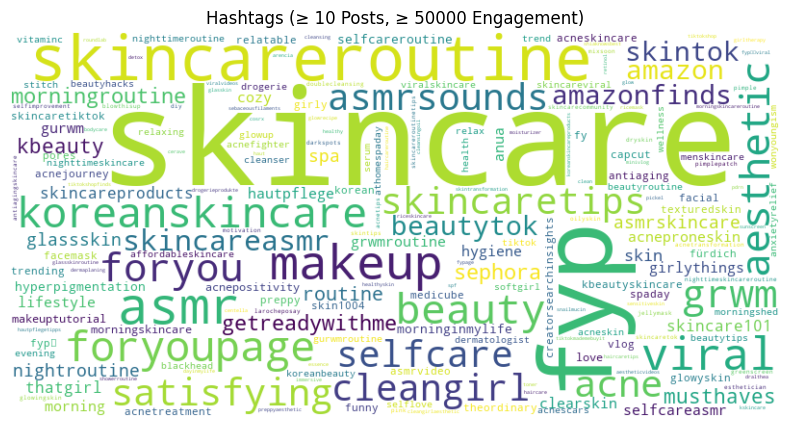

In [17]:
import ipywidgets as widgets
from IPython.display import display
from wordcloud import WordCloud

# Pre-calculate hashtag statistics
hashtag_wordcloud= hashtag_posts_filtered.groupby('hashtags_name').agg(
    total_posts=('id', 'nunique'),
    total_engagement=('engagement', 'sum')
).reset_index()

# Interactive function
def generate_wordcloud(min_posts=10, min_engagement=50000):
    # Filter based on widget inputs
    filtered_stats = hashtag_wordcloud[
        (hashtag_wordcloud['total_posts'] >= min_posts) &
        (hashtag_wordcloud['total_engagement'] >= min_engagement)
    ]
    
    # If no hashtags match, show message
    if filtered_stats.empty:
        print("No hashtags meet the criteria.")
        return
    
    # Convert to dict for WordCloud
    hashtag_dict = dict(zip(filtered_stats['hashtags_name'], filtered_stats['total_engagement']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_dict)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags (≥ {min_posts} Posts, ≥ {min_engagement} Engagement)')
    plt.show()

generate_wordcloud()


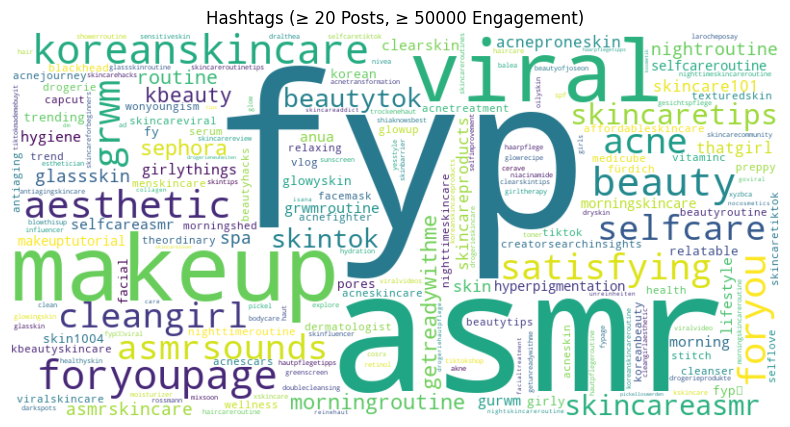

In [18]:

main_hashtags = ['skincare', 'skincareroutine', 'hautpflege', 'hauptflegeroutine']

def generate_wordcloud_nomainhashtags(min_posts=20, min_engagement=50000):
    # Filter based on widget inputs
    filtered_stats = hashtag_wordcloud[
        (hashtag_wordcloud['total_posts'] >= min_posts) &
        (hashtag_wordcloud['total_engagement'] >= min_engagement)
    ]
    
    # Exclude main hashtags
    filtered_stats = filtered_stats[~filtered_stats['hashtags_name'].isin(main_hashtags)]
    
    # If no hashtags match, show message
    if filtered_stats.empty:
        print("No hashtags meet the criteria.")
        return
    
    # Convert to dict for WordCloud
    hashtag_dict = dict(zip(filtered_stats['hashtags_name'], filtered_stats['total_engagement']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_dict)
    
    # Plot
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Hashtags (≥ {min_posts} Posts, ≥ {min_engagement} Engagement)')
    plt.show()

generate_wordcloud_nomainhashtags()

## Co-occurance

In [19]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Step 1: Ensure hashtags are in list form per post
# If they are already in a column per post, skip this
df = hashtag_posts_filtered.copy()
df_grouped = df.groupby('id')['hashtags_name'].apply(lambda x: list(set(x))).reset_index()

# Step 2: Count co-occurrence pairs
co_occurrence = Counter()
for tags in df_grouped['hashtags_name']:
    if len(tags) > 1:
        cleaned_tags = [tag for tag in tags if isinstance(tag, str) and tag.strip()]
        if len(cleaned_tags) > 1:
            for pair in combinations(sorted(cleaned_tags), 2):
                co_occurrence[pair] += 1

# Step 3: Convert to DataFrame
co_occurrence_df = pd.DataFrame([
    {'hashtag_1': h1, 'hashtag_2': h2, 'count': count}
    for (h1, h2), count in co_occurrence.items()
])

# Optional: Filter for frequently co-occurring pairs
co_occurrence_df = co_occurrence_df[co_occurrence_df['count'] >= 5]  # Adjust threshold as needed

# View top pairs
co_occurrence_df.sort_values('count', ascending=False)


,hashtag_1,hashtag_2,count
84,skincare,skincareroutine,922
124,fyp,skincare,730
77,hautpflege,skincare,501
407,skincare,skincaretips,372
103,fyp,skincareroutine,361
...,...,...,...
55997,selfimprovement,skincareroutine,5
56078,byoma,glowrecipe,5
56238,dmdrogerie,neubeidm,5
56248,drogeriehaul,unbezahlt,5


In [20]:
from itertools import combinations
from collections import Counter
import pandas as pd

# Ensure the 'date' column is in pandas datetime format
hashtag_posts_filtered['date'] = pd.to_datetime(hashtag_posts_filtered['date'])

# Now filter the last 6 months
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
recent_df = hashtag_posts_filtered[hashtag_posts_filtered['date'] >= cutoff_date].copy()

# Step 1: Filter to the last 6 months
cutoff_date = pd.Timestamp.today() - pd.DateOffset(months=6)
recent_df = hashtag_posts_filtered[hashtag_posts_filtered['date'] >= cutoff_date].copy()

# Step 2: Group hashtags per post
df_grouped = recent_df.groupby('id')['hashtags_name'].apply(lambda x: list(set(x))).reset_index()

# Step 3: Count co-occurrence of all hashtags
co_occurrence = Counter()

for tags in df_grouped['hashtags_name']:
    if isinstance(tags, list) and len(tags) > 1:
        cleaned_tags = [tag for tag in tags if isinstance(tag, str) and tag.strip()]
        for pair in combinations(sorted(cleaned_tags), 2):
            co_occurrence[pair] += 1

# Step 4: Convert to DataFrame
co_df = pd.DataFrame([
    {'hashtag_1': h1, 'hashtag_2': h2, 'count': count}
    for (h1, h2), count in co_occurrence.items()
])

# Step 5: Calculate total connections per hashtag
top_hashtags = pd.concat([
    co_df[['hashtag_1', 'count']].rename(columns={'hashtag_1': 'hashtag'}),
    co_df[['hashtag_2', 'count']].rename(columns={'hashtag_2': 'hashtag'})
]).groupby('hashtag').sum().reset_index().sort_values('count', ascending=False)

# View top co-occurring hashtags overall
top_hashtags.head(20)


/var/folders/5k/b8_r8jw502n4zztm42zd76m80000gn/T/ipykernel_2328/402797097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_posts_filtered['date'] = pd.to_datetime(hashtag_posts_filtered['date'])


,hashtag,count
5323,skincare,10088
2777,hautpflege,6626
5432,skincareroutine,6151
2234,fyp,6021
3322,koreanskincare,3252
5167,selfcare,3121
2492,glowup,3105
5457,skincaretips,2777
800,beauty,2500
6254,viral,2392


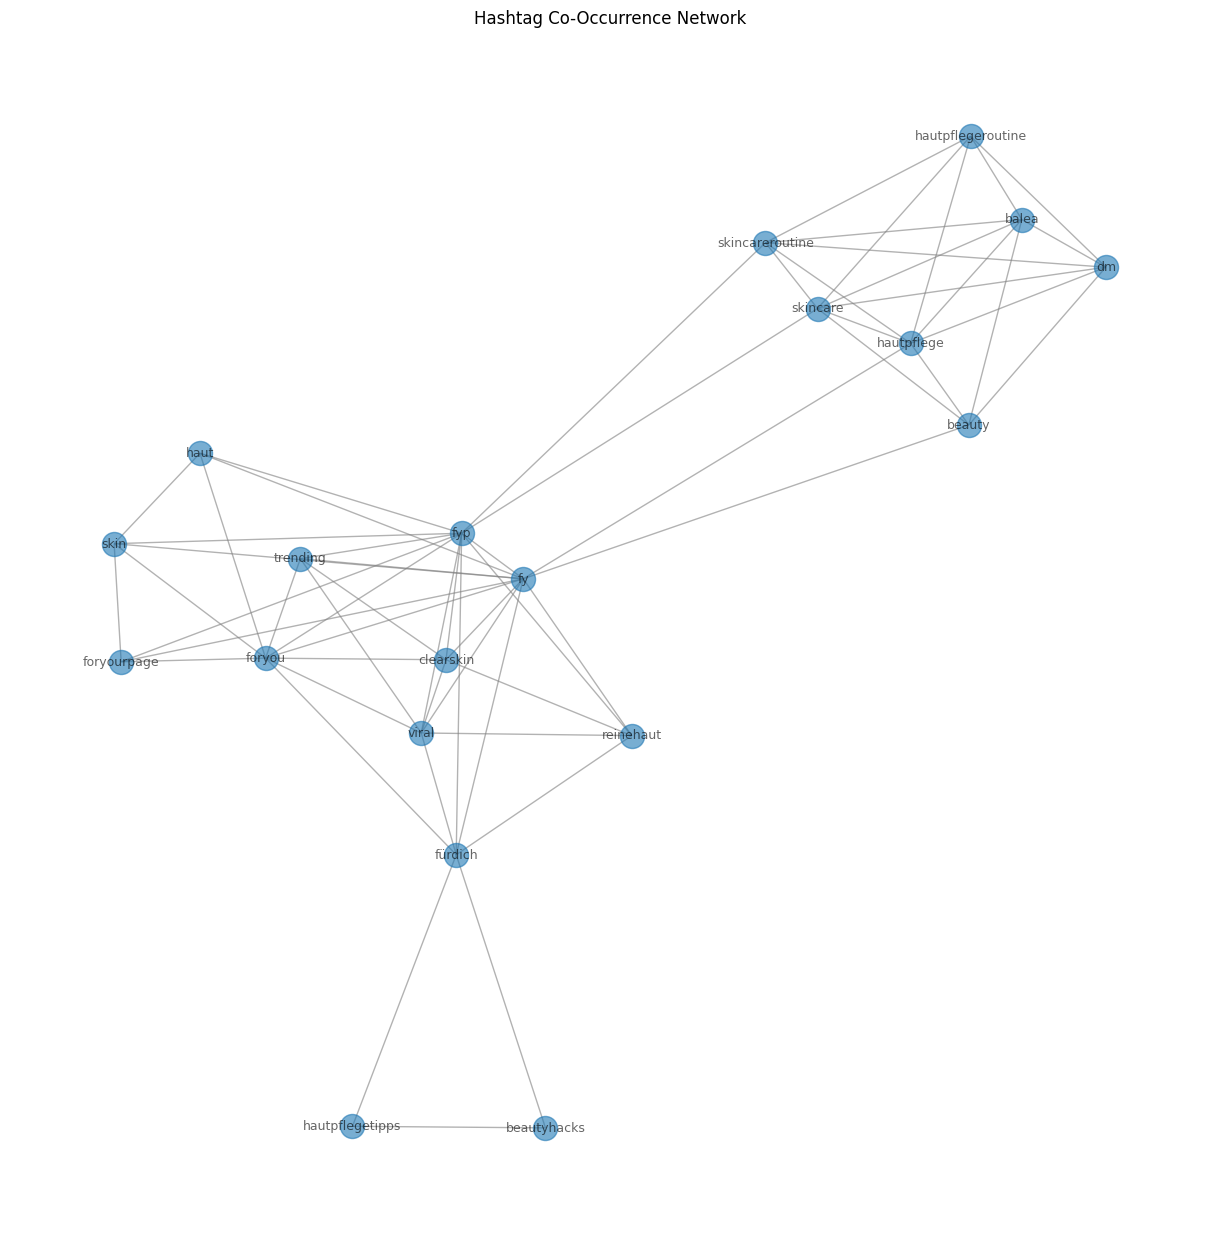

In [21]:
import networkx as nx

# Create graph
G = nx.from_pandas_edgelist(co_occurrence_df.head(100), 'hashtag_1', 'hashtag_2', edge_attr='count')

# Optionally filter for dense network
G = G.subgraph([n for n, d in G.degree() if d > 3])

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_size=300, font_size=9, edge_color='gray', alpha=0.6)
plt.title("Hashtag Co-Occurrence Network")
plt.show()


In [22]:
import networkx as nx
from networkx.algorithms import community
import pandas as pd

# Rebuild the graph from your co-occurrence dataframe
G = nx.from_pandas_edgelist(co_occurrence_df, 'hashtag_1', 'hashtag_2', edge_attr='count')

# Use a community detection algorithm (greedy modularity)
communities = community.greedy_modularity_communities(G)

# Convert frozen sets to list for readability
hashtag_clusters = [list(c) for c in communities]

for i, cluster in enumerate(hashtag_clusters):
    print(f"🔹 Cluster {i+1} ({len(cluster)} hashtags):", cluster[:10], '...')


🔹 Cluster 1 (643 hashtags): ['menskincare', 'dm', 'dermatologe', 'haircare', 'antiagingskincare', 'schönehauttipps', 'unreinehautbekämpfen', 'dmhaul', 'skinpicking', 'frischekosmetik'] ...
🔹 Cluster 2 (100 hashtags): ['selbstliebe', 'strafferbauch', 'natürlichschön', 'massageroutine', 'mitesserfrei', 'hautverjüngung', 'wohlfühlkörper', 'schlankundleicht', 'körperpflege', 'ästhetischemedizin'] ...
🔹 Cluster 3 (69 hashtags): ['pinkaesthetic', 'asmrfacial', 'thatgirlaesthetic', 'sephora', 'treatment', 'girlytok', 'anxietyrelief', 'health', 'evening', 'selfcaretiktok'] ...
🔹 Cluster 4 (24 hashtags): ['makeuproutine', 'makeuptutorial', 'skinmoments', 'beautycommunity', 'ugccontent', 'ugcmarketing', 'pflegeroutine', 'nivea', 'beautybloggerin', 'makeupziele'] ...
🔹 Cluster 5 (21 hashtags): ['ideas', 'virale', 'videoviral', 'fürdichpage', 'foruyou_page', 'page', 'foruyou', 'action', 'goodthing', 'sound'] ...
🔹 Cluster 6 (19 hashtags): ['koreanischekosmetik', '독일어공부', 'корейский', 'koreanlearni

Which hashtags are good to use in our tiktok post

In [23]:
hashtag_posts_filtered.columns

Index(['id', 'text', 'textLanguage', 'createTimeISO', 'isAd', 'isMuted',
       'diggCount', 'shareCount', 'playCount', 'collectCount', 'commentCount',
       'isSlideshow', 'isPinned', 'isSponsored', 'authorMeta_nickName',
       'authorMeta_verified', 'authorMeta_signature',
       'authorMeta_privateAccount', 'authorMeta_ttSeller', 'authorMeta_fans',
       'authorMeta_heart', 'authorMeta_video', 'authorMeta_digg',
       'authorMeta_region', 'authorMeta_musicName', 'authorMeta_musicAuthor',
       'videoMeta_duration', 'videoMeta_definition',
       'detailedMentions_nickName', 'hashtags_name', 'effectStickers_name',
       'searchHashtag_views', 'searchHashtag_name', 'locationMeta_address',
       'date', 'month', 'year', 'week', 'engagement'],
      dtype='object')

# ML Models

### With diggCount and enagement 

In [24]:
def train_hashtag_engagement_model(df):
    import pandas as pd
    import numpy as np
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report
    from scipy.sparse import hstack
    from collections import Counter

    # Step 1: Drop missing hashtags
    df = df.dropna(subset=['hashtags_name']).copy()

    # Step 2: Group hashtags per post
    hashtags_grouped = df.groupby('id')['hashtags_name'].apply(list).reset_index()

    # Step 3: Post-level features
    post_features = df.drop_duplicates(subset='id')[
        ['id', 'engagement', 'text', 'diggCount', 'date']
    ].copy()

    # Step 4: Merge
    posts = hashtags_grouped.merge(post_features, on='id', how='left')

    # Step 5: Target variable
    median_engagement = posts['engagement'].median()
    posts['high_engagement'] = (posts['engagement'] > median_engagement).astype(int)

    # Step 6: Time features
    posts['date'] = pd.to_datetime(posts['date'], errors='coerce')
    posts['hour'] = posts['date'].dt.hour.fillna(0).astype(int)
    posts['dayofweek'] = posts['date'].dt.dayofweek.fillna(0).astype(int)

    # Step 7: Text prep
    posts['hashtags_str'] = posts['hashtags_name'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    posts['text'] = posts['text'].fillna('')

    # Step 8: Vectorize text & hashtags
    hashtag_vec = CountVectorizer()
    text_vec = CountVectorizer(max_features=300)

    X_hashtag = hashtag_vec.fit_transform(posts['hashtags_str'])
    X_text = text_vec.fit_transform(posts['text'])

    # Step 9: Numeric features
    num_features = posts[['diggCount', 'hour', 'dayofweek']].fillna(0)
    scaler = StandardScaler()
    X_num = scaler.fit_transform(num_features)

    # Step 10: Combine features
    X = hstack([X_hashtag, X_text, X_num])
    y = posts['high_engagement']

    # Step 11: Train model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Step 12: Evaluate
    print("📊 Model Performance:")
    print(classification_report(y_test, model.predict(X_test)))

    # Step 13: Feature importance
    feature_names = list(hashtag_vec.get_feature_names_out()) + \
                    list(text_vec.get_feature_names_out()) + \
                    ['diggCount', 'hour', 'dayofweek']

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.coef_[0]
    }).sort_values('importance', ascending=False)

    return {
        'model': model,
        'hashtag_vec': hashtag_vec,
        'text_vec': text_vec,
        'scaler': scaler,
        'importance_df': importance_df,
        'posts': posts
    }

result = train_hashtag_engagement_model(hashtag_posts_filtered)

model = result['model']
importance_df = result['importance_df']
importance_df.head(10)




📊 Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       458
           1       0.82      0.75      0.78       514

    accuracy                           0.78       972
   macro avg       0.78      0.78      0.78       972
weighted avg       0.79      0.78      0.78       972



,feature,importance
10172,diggCount,14.606717
7720,shiaknowsbest,1.642121
5880,männerpflege,1.085508
8441,stitch,0.946221
379,amazon,0.941447
2331,dradel,0.886207
9953,drogerieprodukte,0.852101
3276,gesichtsmasken,0.845873
2324,dove,0.828477
2312,douglascosmetics,0.820754


### With playCount

In [25]:
def train_hashtag_model_with_popularity_playCount(df):
    import pandas as pd
    import numpy as np
    from collections import Counter
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import classification_report
    from scipy.sparse import hstack

    # Step 1: Clean & prepare
    df = df.dropna(subset=['hashtags_name']).copy()
    hashtags_grouped = df.groupby('id')['hashtags_name'].apply(list).reset_index()
    post_features = df.drop_duplicates(subset='id')[['id', 'engagement', 'text', 'playCount', 'date']].copy()
    posts = hashtags_grouped.merge(post_features, on='id', how='left')

    # Step 2: Target label
    median_engagement = posts['engagement'].median()
    posts['high_engagement'] = (posts['engagement'] > median_engagement).astype(int)

    # Step 3: Time features
    posts['date'] = pd.to_datetime(posts['date'], errors='coerce')
    posts['hour'] = posts['date'].dt.hour.fillna(0).astype(int)
    posts['dayofweek'] = posts['date'].dt.dayofweek.fillna(0).astype(int)

    # Step 4: Text/hashtag prep
    posts['hashtags_str'] = posts['hashtags_name'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
    posts['text'] = posts['text'].fillna('')

    # Step 5: Hashtag frequency
    all_hashtags = posts['hashtags_name'].explode()
    hashtag_freq = Counter(all_hashtags)
    posts['avg_hashtag_popularity'] = posts['hashtags_name'].apply(
        lambda tags: np.mean([hashtag_freq.get(tag, 0) for tag in tags]) if isinstance(tags, list) and tags else 0
    )

    # Step 6: Vectorize
    hashtag_vec = CountVectorizer()
    text_vec = CountVectorizer(max_features=300)
    X_hashtag = hashtag_vec.fit_transform(posts['hashtags_str'])
    X_text = text_vec.fit_transform(posts['text'])

    # Step 7: Numeric features
    num_features = posts[['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']].fillna(0)
    scaler = StandardScaler()
    X_num = scaler.fit_transform(num_features)

    # Step 8: Combine
    X = hstack([X_hashtag, X_text, X_num])
    y = posts['high_engagement']

    # Step 9: Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Step 10: Evaluate
    print("📊 Model Performance:")
    print(classification_report(y_test, model.predict(X_test)))

    # Step 11: Feature importance
    feature_names = list(hashtag_vec.get_feature_names_out()) + \
                    list(text_vec.get_feature_names_out()) + \
                    ['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']

    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.coef_[0]
    }).sort_values('importance', ascending=False)

    return {
        'model': model,
        'hashtag_vec': hashtag_vec,
        'text_vec': text_vec,
        'scaler': scaler,
        'importance_df': importance_df,
        'posts': posts,
        'hashtag_freq': hashtag_freq  # useful for predictions
    }


In [26]:
results = train_hashtag_model_with_popularity_playCount(hashtag_posts_filtered)

model = results['model']
importance_df = results['importance_df']
importance_df.head(10)  # 🔍 Top predictive features


📊 Model Performance:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       458
           1       0.82      0.76      0.79       514

    accuracy                           0.79       972
   macro avg       0.79      0.79      0.79       972
weighted avg       0.79      0.79      0.79       972



,feature,importance
10172,playCount,9.890140
7720,shiaknowsbest,1.754745
8441,stitch,1.275107
5880,männerpflege,1.239060
5710,mixahautpflege,1.223465
9953,drogerieprodukte,1.001744
2312,douglascosmetics,0.971497
6331,oneforyouoneforme,0.961872
379,amazon,0.952394
8161,skinmoments,0.934582


| Metric                  || What it Means                                        
| ----------------------- || ---------------------------------------------------- 
|   Accuracy              || Our model correctly predicted **79%** of the posts. 
|   Precision (class 1)   || of posts predicted to go viral actually did.  
|   Recall (class 1)      || It caught 76% of all actual high-engagement posts.   
|   F1-score (class 1)    || Balanced metric — high means good generalization.    


In [27]:
# Get names of features by source
hashtag_features = results['hashtag_vec'].get_feature_names_out()
text_features = results['text_vec'].get_feature_names_out()
numeric_features = ['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity']

# Add type labels to the DataFrame
def classify_feature_type(f):
    if f in hashtag_features:
        return 'hashtag'
    elif f in text_features:
        return 'caption'
    elif f in numeric_features:
        return 'numeric'
    else:
        return 'other'

importance_df['type'] = importance_df['feature'].apply(classify_feature_type)
# Aggregate total absolute weight by type
summary = importance_df.groupby('type')['importance'].agg(['count', 'mean', 'sum', lambda x: x.abs().sum()])
summary.columns = ['feature_count', 'mean_importance', 'total_signed_importance', 'total_abs_importance']
summary = summary.sort_values('total_abs_importance', ascending=False)

print("📊 Feature Importance Summary by Type:")
print(summary)


📊 Feature Importance Summary by Type:
         feature_count  mean_importance  total_signed_importance  \
type                                                               
hashtag          10027        -0.008382               -84.046693   
caption            145        -0.000041                -0.006015   
numeric              4         2.534242                10.136968   

         total_abs_importance  
type                           
hashtag           1199.816008  
caption             38.623858  
numeric             10.136968  


+ The model gives the most weight overall to hashtags — some boost engagement a lot, others hurt it.
+ Caption content does have impact, but much less than hashtags.
+ Your numeric features (like playCount, hour, etc.) also play a significant role — with consistent positive influence.

In [28]:
def predict_post_success(
    hashtags,
    caption,
    play_count,
    hour,
    dayofweek,
    results,
    caption_weight=1.0,
    hashtag_weight=1.0,
    return_confidence_label=True
):
    """
    Predict high engagement probability for a TikTok post.
    - hashtags: list of hashtags used
    - caption: string (post text)
    - play_count, hour, dayofweek: numeric features
    - results: output from train_hashtag_model_with_popularity_playCount()
    - caption_weight, hashtag_weight: scale the effect of text/hashtags
    - return_confidence_label: if True, returns a user-friendly label
    """

    import numpy as np
    import pandas as pd
    from scipy.sparse import hstack

    # Unpack model components
    hashtag_vec = results['hashtag_vec']
    text_vec = results['text_vec']
    scaler = results['scaler']
    model = results['model']
    importance_df = results['importance_df']
    hashtag_freq = results['hashtag_freq']

    # Vectorize hashtags and caption
    hashtags_str = ' '.join(hashtags)
    X_hashtag = hashtag_vec.transform([hashtags_str]) * hashtag_weight
    X_text = text_vec.transform([caption]) * caption_weight

    # Compute avg hashtag popularity
    avg_popularity = np.mean([hashtag_freq.get(tag, 0) for tag in hashtags]) if hashtags else 0

    # Scale numeric features
    numeric_input = pd.DataFrame([[play_count, hour, dayofweek, avg_popularity]],
                                 columns=['playCount', 'hour', 'dayofweek', 'avg_hashtag_popularity'])
    X_num = scaler.transform(numeric_input)

    # Combine all features
    X_new = hstack([X_hashtag, X_text, X_num])
    prob = model.predict_proba(X_new)[0][1]  # Probability of high engagement

    # Get hashtag-specific estimated impact
    hashtag_importance_dict = dict(zip(importance_df['feature'], importance_df['importance']))
    tag_impact = {tag: hashtag_importance_dict.get(tag.lower(), 0) for tag in hashtags}
    tag_impact_df = pd.DataFrame(list(tag_impact.items()), columns=['hashtag', 'estimated_impact']) \
                      .sort_values('estimated_impact', ascending=False)

    # Optional: confidence band
    if return_confidence_label:
        if prob >= 0.8:
            confidence = "🔥 Highly Likely to Perform Well"
        elif prob >= 0.6:
            confidence = "👍 Likely to Perform OK"
        elif prob >= 0.4:
            confidence = "🤔 Uncertain Performance"
        else:
            confidence = "⚠️ Unlikely to Perform Well"
        return prob, tag_impact_df, confidence

    return prob, tag_impact_df


In [29]:
text_features = results['text_vec'].get_feature_names_out()
caption_words = results['importance_df'][
    results['importance_df']['feature'].isin(text_features)
].sort_values('importance', ascending=False)

caption_words

,feature,importance,type
9953,drogerieprodukte,1.001744,hashtag
379,amazon,0.952394,hashtag
10081,pickel,0.920297,hashtag
10018,immer,0.864358,caption
10035,lip,0.831556,hashtag
...,...,...,...
512,anzeige,-0.955599,hashtag
10013,hydration,-1.086596,hashtag
9938,deiner,-1.173877,caption
10006,hautpflegeroutine,-1.205449,hashtag


In [30]:
total_importance_caption = caption_words['importance'].abs().sum()
total_importance_all = results['importance_df']['importance'].abs().sum()

print(f"📌 Caption accounts for ~{(total_importance_caption / total_importance_all * 100):.1f}% of the model's decisions.")


📌 Caption accounts for ~9.9% of the model's decisions.


In [31]:
hashtags = ['skincare', 'funny']
caption = "My skincare routine is 🔥 and super effective!"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=20, hour=19, dayofweek=6,
    results=results,
    caption_weight=1.5  # increase text impact
)

print(f"🎯 High Engagement Probability: {pred_prob:.2%}")
print(f"{confidence}")
display(tag_effects)


🎯 High Engagement Probability: 68.95%
👍 Likely to Perform OK


,hashtag,estimated_impact
1,funny,0.586297
0,skincare,-0.167887


In [ ]:
hashtags = ['skincare', 'dermatologisttips', 'spf', 'glassskin']
caption = "Derm-approved routine for radiant skin ✨ #SPF is a must!"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=25, hour=10, dayofweek=1,  # Monday morning
    results=results
)
print(f"🎯 High Engagement Probability: {pred_prob:.2%}")
print(f"{confidence}")
display(tag_effects)



🎯 High Engagement Probability: 40.55%
🤔 Uncertain Performance


,hashtag,estimated_impact
3,glassskin,0.239154
1,dermatologisttips,0.000000
0,skincare,-0.167887
2,spf,-0.240208


In [33]:
hashtags = ['skincarestruggles', 'funny', 'pimplepatch', 'reallife']
caption = "When your skin waits until picture day to break out 😩 #relatable"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=30, hour=21, dayofweek=4,  # Thursday night
    results=results,
    caption_weight=1.5
)

print("Basic Product Review")
print(f"📉 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Basic Product Review
📉 High Engagement Probability: 32.84%


,hashtag,estimated_impact
1,funny,0.586297
0,skincarestruggles,0.000000
3,reallife,0.000000
2,pimplepatch,-0.464095


In [34]:
hashtags = ['moisturizerreview', 'byoma', 'skincaretok', 'fyp']
caption = "Tried the new BYOMA gel cream — worth the hype? Here’s my honest review 👀"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=12, hour=16, dayofweek=3,  # Wednesday afternoon
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 31.17%


,hashtag,estimated_impact
1,byoma,0.792355
0,moisturizerreview,-0.141359
3,fyp,-0.144943
2,skincaretok,-0.556992


In [35]:
hashtags = ['london', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 7.65%


,hashtag,estimated_impact
0,london,0.142704
2,naturkosmetik,-0.793025
1,ad,-0.942093


In [36]:
hashtags = ['berlin', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 3.60%


,hashtag,estimated_impact
0,berlin,-0.655304
2,naturkosmetik,-0.793025
1,ad,-0.942093


In [37]:
hashtags = ['nyc', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 8.84%


,hashtag,estimated_impact
0,nyc,0.300752
2,naturkosmetik,-0.793025
1,ad,-0.942093


In [38]:
hashtags = ['dubai', 'ad', 'naturkosmetik']
caption = "💥💥💥"
pred_prob, tag_effects, confidence = predict_post_success(
    hashtags, caption,
    play_count=5, hour=7, dayofweek=0,  # Sunday morning
    results=results
)


print("Educational Skincare")
print(f"📊 High Engagement Probability: {pred_prob:.2%}")
display(tag_effects)


Educational Skincare
📊 High Engagement Probability: 6.62%


,hashtag,estimated_impact
0,dubai,-0.011481
2,naturkosmetik,-0.793025
1,ad,-0.942093


# Comments hashtags 